# Features Engineering and Data Preparation 

## Import General Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Prepration

## Read in Data and Instantiate DataFrame

In [ ]:
# import data frame from txt
df = pd.read_csv('../data/raw_data.txt', sep='\t')

In [3]:
# look at data frame head
df.head()

,expected_arrival_date,distribution_center,week,supplier,sku_id,sku_name,product,unit_price_loc,item_quantity,order_type,unit_weight_value,unit_weight_uom,country,currency,to_eur,sku_category
0,29/08/2018 05:00,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,g,AU,AUD,0.61,PTN
1,14/08/2018 11:30,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,g,AU,AUD,0.61,PRO
2,21/09/2018 06:00,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,g,AU,AUD,0.61,PTN
3,12/11/2018 7:00,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,g,AU,AUD,0.61,PRO
4,21/09/2018 10:00,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,g,AU,AUD,0.61,PRO


In [4]:
# df[df['sku_id']=='PTN-00-00423-4']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13526 entries, 0 to 13525
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   expected_arrival_date  13526 non-null  object 
 1   distribution_center    13526 non-null  object 
 2   week                   13526 non-null  object 
 3   supplier               13526 non-null  object 
 4   sku_id                 13526 non-null  object 
 5   sku_name               13526 non-null  object 
 6   product                13526 non-null  object 
 7   unit_price_loc         13526 non-null  float64
 8   item_quantity          13526 non-null  float64
 9   order_type             13526 non-null  object 
 10  unit_weight_value      13526 non-null  int64  
 11  unit_weight_uom        13526 non-null  object 
 12  country                13526 non-null  object 
 13  currency               13526 non-null  object 
 14  to_eur                 13526 non-null  float64
 15  sk

In [6]:
#! pip install tabulate
from tabulate import tabulate

In [7]:
l = []

for c in df:
    if len(df[c].unique())>8: 
        l.append([c,len(df[c].unique()),'?','?'])
    else: 
        l.append([c,list(df[c].unique()),'?','?'])

print(tabulate(l,headers=['col_name','unique_values','description','UOM'],tablefmt='orgtbl'))

| col_name              | unique_values                        | description   | UOM   |
|-----------------------+--------------------------------------+---------------+-------|
| expected_arrival_date | 1528                                 | ?             | ?     |
| distribution_center   | ['SY', 'GR', 'VE', 'CB', 'NW', 'MP'] | ?             | ?     |
| week                  | 36                                   | ?             | ?     |
| supplier              | 136                                  | ?             | ?     |
| sku_id                | 784                                  | ?             | ?     |
| sku_name              | 772                                  | ?             | ?     |
| product               | 226                                  | ?             | ?     |
| unit_price_loc        | 417                                  | ?             | ?     |
| item_quantity         | 4315                                 | ?             | ?     |
| order_type         

## Export Raw Data as CSV

In [8]:
# export data fram to csv
df.to_csv('../data/raw_data.csv',index=False)

## Drop Features Without Information

In [9]:
# all rows have the UOM grams
# -> we can drop the column
df['unit_weight_uom'] = 'g'

In [10]:
df.head()

,expected_arrival_date,distribution_center,week,supplier,sku_id,sku_name,product,unit_price_loc,item_quantity,order_type,unit_weight_value,unit_weight_uom,country,currency,to_eur,sku_category
0,29/08/2018 05:00,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,g,AU,AUD,0.61,PTN
1,14/08/2018 11:30,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,g,AU,AUD,0.61,PRO
2,21/09/2018 06:00,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,g,AU,AUD,0.61,PTN
3,12/11/2018 7:00,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,g,AU,AUD,0.61,PRO
4,21/09/2018 10:00,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,g,AU,AUD,0.61,PRO


In [11]:
df.drop(['expected_arrival_date','unit_weight_uom'],axis=1,inplace=True)

In [12]:
df.head()

,distribution_center,week,supplier,sku_id,sku_name,product,unit_price_loc,item_quantity,order_type,unit_weight_value,country,currency,to_eur,sku_category
0,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN
1,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO
2,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN
3,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO
4,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO


## Rename Columns

In [13]:
r_map = {
    "distribution_center":"fc",
    "supplier":"supplier_name",
    "sku_id":"prod_sku",
    "sku_name":"prod_name",
    "product":"prod_tags",
    "unit_price_loc":"prod_price_local",
    "item_quantity":"order_size",
    "order_type":"order_type",
    "unit_weight_value":"prod_weight",
    "country":"supplier_country",
    "currency":"local_curr",
    "to_eur":"local_curr_to_eur",
    "sku_category":"prod_category"
}

In [14]:
r_map

{'distribution_center': 'fc',
 'supplier': 'supplier_name',
 'sku_id': 'prod_sku',
 'sku_name': 'prod_name',
 'product': 'prod_tags',
 'unit_price_loc': 'prod_price_local',
 'item_quantity': 'order_size',
 'order_type': 'order_type',
 'unit_weight_value': 'prod_weight',
 'country': 'supplier_country',
 'currency': 'local_curr',
 'to_eur': 'local_curr_to_eur',
 'sku_category': 'prod_category'}

In [15]:
df.rename(columns=r_map,inplace=True)

In [16]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category
0,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN
1,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO
2,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN
3,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO
4,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO


## Translate non-English words

In [17]:
# df_de = df[df['supplier_country']=='DE']

In [18]:
# df_de.head()

In [19]:
# from dotenv import dotenv_values
# config = dotenv_values("./.env")

In [20]:
# key, = config.values()

In [21]:
#!pip install deepl
# import deepl 

In [22]:
# translator = deepl.Translator(auth_key=key) 

In [23]:
# df_de['prod_name_en'] = df_de['prod_name'].apply(lambda prod : translator.translate_text(prod, source_lang='de', target_lang='en-us').text)

In [24]:
# df_de.to_csv('../data/data_de.csv')

In [25]:
# df_de2 = df_de

In [26]:
df_de = pd.read_csv('../data/data_de.csv')

In [27]:
df_de = df_de.set_index('Unnamed: 0')

In [28]:
df_de.head()

,order_eta,fc,supplier_name,prod_sku,prod_name,prod_keywords,prod_price_loc,order_size,order_type,prod_weight,supplier_country,loc_curr,loc_curr_to_eur,prod_category,prod_name_en
Unnamed: 0,,,,,,,,,,,,,,,
10851,13/06/2018 04:00,VE,Mike Poultry,PTN-00-11299-2,Kochschinken 180g,"pork, ham, cooked",1.35,292.0,Regular,180,DE,EUR,1.0,PTN,Cooked ham 180g
10852,25/07/2018 06:00,VE,George Rooster,DAI-00-10143-3,Schmand 150g,"soured cream, schmand",0.44,21060.0,Regular,150,DE,EUR,1.0,DAI,Sour cream 150g
10853,10/08/2018 3:30,VE,Hannah Chicken,PTN-00-11331-2,Hähnchenbrustfilet 3 Stück 420g,"chicken, breast",2.30,482.0,Regular,420,DE,EUR,1.0,PTN,Chicken breast fillet 3 pieces 420g
10854,03/08/2018 3:30,VE,Hannah Chicken,PTN-00-11333-2,Putenbrust 2 Stück 280g,"turkey, breast",1.89,5336.0,Regular,280,DE,EUR,1.0,PTN,Turkey breast 2 pieces 280g
10855,28/09/2018 04:00,VE,LTD Dairy and Co,PTN-00-11323-2,Garnelen ohne Schale 200g,prawn,2.32,368.0,Regular,200,DE,EUR,1.0,PTN,Shrimp without shell 200g


## Integrate Translated Words into Main DataFrame

In [29]:
de_rows = list(df_de.index)

In [30]:
for i in de_rows:
    df.loc[i,'prod_name'] = df_de['prod_name_en'].loc[i]

In [31]:
df.to_csv('../data/data_en.csv',index=False)

In [32]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category
0,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN
1,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO
2,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN
3,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO
4,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO


## Check for Missing Data

In [33]:
def percent_missing(df): 
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [34]:
percent_missing(df).sum()
# no misiing data

0.0

In [35]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category
0,SY,2018-W36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN
1,SY,2018-W34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO
2,SY,2018-W39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN
3,SY,2018-W47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO
4,SY,2018-W39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13526 entries, 0 to 13525
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fc                 13526 non-null  object 
 1   week               13526 non-null  object 
 2   supplier_name      13526 non-null  object 
 3   prod_sku           13526 non-null  object 
 4   prod_name          13526 non-null  object 
 5   prod_tags          13526 non-null  object 
 6   prod_price_local   13526 non-null  float64
 7   order_size         13526 non-null  float64
 8   order_type         13526 non-null  object 
 9   prod_weight        13526 non-null  int64  
 10  supplier_country   13526 non-null  object 
 11  local_curr         13526 non-null  object 
 12  local_curr_to_eur  13526 non-null  float64
 13  prod_category      13526 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.4+ MB


# Prepare Datetime Columns

In [37]:
df['week'] = df['week'].str.extract(r'(\d+\-W)(\d+)')[1]

In [38]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category
0,SY,36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN
1,SY,34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO
2,SY,39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN
3,SY,47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO
4,SY,39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO


# Standardize Price

In [45]:
df['prod_price_eur'] = df['prod_price_local']*df['local_curr_to_eur']

In [49]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category,prod_price_eur
0,SY,36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN,3.4953
1,SY,34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO,0.0732
2,SY,39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN,6.0268
3,SY,47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO,0.0732
4,SY,39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO,0.4819


# Calcualte Order Weight and Cost

In [52]:
df['order_weight'] = df['order_size']*df['prod_weight']/1000
# unit is kg/order

In [57]:
df['order_cost_eur'] = df['order_size']*df['prod_price_eur']

In [65]:
df['order_eur_cost_per_kg'] = df['order_cost_eur']/df['order_weight']

In [66]:
df.head()

,fc,week,supplier_name,prod_sku,prod_name,prod_tags,prod_price_local,order_size,order_type,prod_weight,supplier_country,local_curr,local_curr_to_eur,prod_category,prod_price_eur,order_weight,order_cost_eur,order_eur_cost_per_kg
0,SY,36,Dairy and Co Rooster,PTN-00-00423-4,"Chicken Breast, 700g","chicken, breast",5.73,4992.0,Regular,700,AU,AUD,0.61,PTN,3.4953,3494.4,17448.5376,4.993286
1,SY,34,Poultry Latte,PRO-10-00318-1,"Beef Stock Cubes, 2unit","stock concentrate, beef",0.12,63840.0,Regular,10,AU,AUD,0.61,PRO,0.0732,638.4,4673.0880,7.320000
2,SY,39,Sons French,PTN-00-01333-4,"Salmon Skin On (4x140g), 560g","salmon, skin on",9.88,870.0,Regular,560,AU,AUD,0.61,PTN,6.0268,487.2,5243.3160,10.762143
3,SY,47,Poultry Latte,PRO-10-01224-1,"Vegetable Stock Cubes, 2unit","stock concentrate, vegetable",0.12,13440.0,Emergency,10,AU,AUD,0.61,PRO,0.0732,134.4,983.8080,7.320000
4,SY,39,Rooster Supply,PRO-10-01534-1,"Corn (tinned), 300g",canned sweetcorn,0.79,3336.0,Regular,300,AU,AUD,0.61,PRO,0.4819,1000.8,1607.6184,1.606333


In [67]:
l = []

for c in df:
    if len(df[c].unique())>8: 
        l.append([c,len(df[c].unique()),'?','?'])
    else: 
        l.append([c,list(df[c].unique()),'?','?'])

print(tabulate(l,headers=['col_name','unique_values','description','UOM'],tablefmt='orgtbl'))
print('\n','Number of rows:', len(df))

| col_name              | unique_values                        | description   | UOM   |
|-----------------------+--------------------------------------+---------------+-------|
| fc                    | ['SY', 'GR', 'VE', 'CB', 'NW', 'MP'] | ?             | ?     |
| week                  | 36                                   | ?             | ?     |
| supplier_name         | 136                                  | ?             | ?     |
| prod_sku              | 784                                  | ?             | ?     |
| prod_name             | 768                                  | ?             | ?     |
| prod_tags             | 226                                  | ?             | ?     |
| prod_price_local      | 417                                  | ?             | ?     |
| order_size            | 4315                                 | ?             | ?     |
| order_type            | ['Regular', 'Emergency']             | ?             | ?     |
| prod_weight        

In [87]:
df.to_csv('../data/eng_data_i.csv')

In [89]:
df.to_csv('../data/eng_data.csv',index=False)

# Explore Corr Heatmap

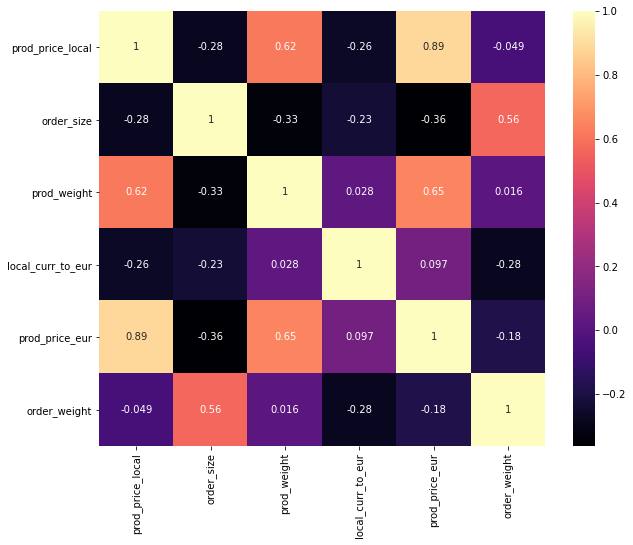

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='magma',annot=True);
# we see a high correlation between prod_weight and pro_price_local

In [83]:
d = df.describe().round(2)

In [85]:
d.transpose().drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
prod_price_local,2.07,1.75,0.01,0.76,1.73,2.81,18.52
order_size,7709.85,17083.60,2.00,320.00,1414.00,6660.00,275400.00
prod_weight,324.08,210.54,8.00,150.00,300.00,450.00,1500.00
local_curr_to_eur,1.01,0.23,0.61,1.00,1.17,1.17,1.17
prod_price_eur,1.99,1.50,0.01,0.68,1.80,3.00,12.56
order_weight,1294.60,2716.36,0.36,90.91,340.50,1344.00,50688.00
order_cost_eur,6019.25,9674.99,0.19,573.16,2000.00,7295.29,133128.00
order_eur_cost_per_kg,6.89,5.10,0.06,4.49,6.10,7.93,125.90
